In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#задём параметры
X = np.array([[-1,1], [1,1], [-1,-1], [1,-1]])
y = np.array([ [1], [0], [0], [1]])


epochs = 10_000
learning_rate = 0.3

inputlayers = 2
hiddenlayers = 3
outputlayers = 1

weight_hidden=np.random.uniform(size=(inputlayers, hiddenlayers)) 
bias_hidden=np.random.uniform(size=(1,hiddenlayers))

weight_output=np.random.uniform(size=(hiddenlayers, outputlayers))
bias_output=np.random.uniform(size=(1, outputlayers))

[[1.]
 [0.]
 [0.]
 [1.]]


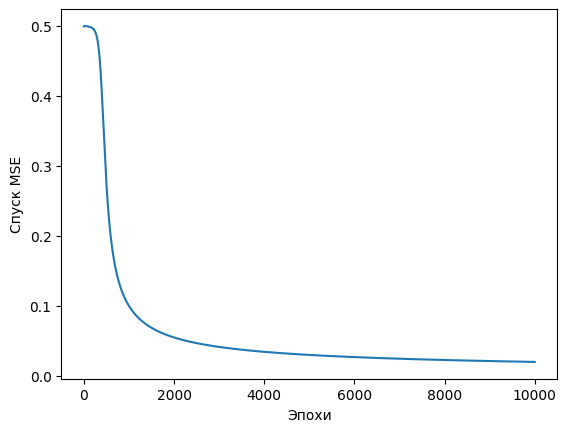

In [69]:
def sigmoid (x): return 1/(1 + np.exp(-x))

def derivative_sigmoid (x): return x * (1 - x)

losses = []  #для графика


for i in range (epochs):

    #forward через обычную сигмоиду
    hidden_input = np.dot(X, weight_hidden) + bias_hidden #линейное уравнение kx+b (+ w нулевое)
    hiddenlayer_activation = sigmoid(hidden_input)

    output_layer_input = np.dot(hiddenlayer_activation, weight_output) + bias_output
    output = sigmoid(output_layer_input)

    #Backward через производную
    error_output = y - output
    derivative_output = error_output * derivative_sigmoid(output)
    error_hidden = derivative_output.dot(weight_output.T)
    derivative_hiddenlayer = error_hidden * derivative_sigmoid(hiddenlayer_activation)

    #обновляем
    weight_output += hiddenlayer_activation.T.dot(derivative_output) * learning_rate
    bias_output += np.sum(derivative_output, axis=0, keepdims=True) * learning_rate
    weight_hidden += X.T.dot(derivative_hiddenlayer) * learning_rate
    bias_hidden += np.sum(derivative_hiddenlayer, axis=0, keepdims=True) * learning_rate

    losses.append(np.mean(np.abs(error_output))) # средний абсолют для каждой эпохи для графика



print(output.round())

plt.plot(losses)
plt.xlabel("Эпохи")
plt.ylabel("Спуск MSE")
plt.show()